# Clase 09: Visualización de Mapas

Por **Daniela Opitz**. <dopitz@udd.cl>.

Actualizado: **21 de mayo de 2024**.

En este notebook trabajaremos con información geográfica. Seguiremos estudiando el data set de viajes de la encuesta origen-destino, esta vez enfocándonos en distintos patrones geográficos que puedan ayudarnos a responder preguntas específicas.


## Preámbulo y Carga de Datos

In [1]:
try:
    import google.colab
    !curl -L -o Fira_Sans_Extra_Condensed.zip 'https://www.dropbox.com/s/82nuhtpybfpjeq9/Fira_Sans_Extra_Condensed.zip?dl=1'
    !unzip -o Fira_Sans_Extra_Condensed.zip
    import matplotlib as mpl
    mpl.font_manager.fontManager.addfont('Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-Regular.ttf')
    #mpl.rc('font', family='Fira Sans Extra Condensed')
    !curl -L -O https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/miniaves.py
except:
    pass

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    74    0    74    0     0    286      0 --:--:-- --:--:-- --:--:--   285
100   320  100   320    0     0    573      0 --:--:-- --:--:-- --:--:--   573
100 3733k  100 3733k    0     0  3156k      0  0:00:01  0:00:01 --:--:-- 44.4M
Archive:  Fira_Sans_Extra_Condensed.zip
  inflating: __MACOSX/._Fira_Sans_Extra_Condensed  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-MediumItalic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-MediumItalic.ttf  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-Italic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-Italic.ttf  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-BlackItalic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-BlackItalic.ttf  
  inflat

In [2]:
#!pip3 install KDEpy
!pip3 install contextily

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 96
# esto depende de las fuentes que tengas instaladas en tu sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"
%config InlineBackend.figure_format = 'retina'

In [4]:
# Recarga modulos locales de Python cada vez que se modifican
%load_ext autoreload
%autoreload 2
from miniaves import figure_from_geodataframe, GeoFacetGrid, bubble_map, heat_map, dot_map, figure_grid_from_geodataframe

In [5]:
viajes_persona=pd.read_csv('https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/data/external/eod_stgo/output/viajes_persona_hogar.csv', sep=',')
viajes_persona

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
0       173431  17343102  1734310202       1          94.0           94.0   
1       173431  17343102  1734310201       1          94.0           94.0   
2       173431  17343101  1734310101       2          94.0          328.0   
3       173431  17343101  1734310102       1         328.0           70.0   
4       173431  17343101  1734310103       2          70.0           94.0   
...        ...       ...         ...     ...           ...            ...   
100329  743813  74381301  7438130102       1          97.0           97.0   
100330  743813  74381302  7438130201       1          97.0           97.0   
100331  743813  74381302  7438130202       1          97.0           97.0   
100332  743823  74382301  7438230101       1          97.0           97.0   
100333  743823  74382301  7438230102       1          97.0           97.0   

        SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  NumVeh  \
0                2.0            2.0         400          407  ...       0   
1                2.0            2.0         407          400  ...       0   
2                2.0            2.0         407          126  ...       0   
3                2.0            4.0         126           15  ...       0   
4                4.0            2.0          15          407  ...       0   
...              ...            ...         ...          ...  ...     ...   
100329           5.0            5.0         235          244  ...       0   
100330           5.0            5.0         244          235  ...       0   
100331           5.0            5.0         235          244  ...       0   
100332           5.0            5.0         235          235  ...       0   
100333           5.0            5.0         235          235  ...       0   

        NumBicAdulto  NumBicNino  Propiedad MontoDiv ImputadoDiv  MontoArr  \
0                  0           0          2  81067.0           1    120000   
1                  0           0          2  81067.0           1    120000   
2                  0           0          2  81067.0           1    120000   
3                  0           0          2  81067.0           1    120000   
4                  0           0          2  81067.0           1    120000   
...              ...         ...        ...      ...         ...       ...   
100329             0           0          1      NaN           0     80000   
100330             0           0          1      NaN           0     80000   
100331             0           0          1      NaN           0     80000   
100332             1           0          1      NaN           0     80000   
100333             1           0          1      NaN           0     80000   

       ImputadoArr  IngresoHogar FactorHogar  
0                0        789356   76.810280  
1                0        789356   76.810280  
2                0        789356   76.810280  
3                0        789356   76.810280  
4                0        789356   76.810280  
...            ...           ...         ...  
100329           0        318005   68.410446  
100330           0        318005   68.410446  
100331           0        318005   68.410446  
100332           0        140007  231.671707  
100333           0        140007  231.671707  

[100334 rows x 96 columns]

In [6]:
viajes_persona["PesoLaboral"] = viajes_persona["FactorLaboralNormal"] * viajes_persona["FactorPersona"]
viajes_persona["PesoLaboral"]

0         53.391740
1         53.391740
2         37.886589
3         52.214368
4         52.214368
            ...    
100329          NaN
100330          NaN
100331          NaN
100332          NaN
100333          NaN
Name: PesoLaboral, Length: 100334, dtype: float64

In [7]:
viajes_persona = viajes_persona[pd.notnull(viajes_persona["PesoLaboral"])]
viajes_persona

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
0      173431  17343102  1734310202       1          94.0           94.0   
1      173431  17343102  1734310201       1          94.0           94.0   
2      173431  17343101  1734310101       2          94.0          328.0   
3      173431  17343101  1734310102       1         328.0           70.0   
4      173431  17343101  1734310103       2          70.0           94.0   
...       ...       ...         ...     ...           ...            ...   
99483  329271  32927104  3292710402       1          96.0           96.0   
99484  329271  32927105  3292710501       1          96.0           95.0   
99485  329271  32927105  3292710502       1          95.0           96.0   
99916  359901  35990102  3599010201       1         335.0           70.0   
99917  359901  35990102  3599010202       1          70.0          335.0   

       SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  \
0               2.0            2.0         400          407  ...   
1               2.0            2.0         407          400  ...   
2               2.0            2.0         407          126  ...   
3               2.0            4.0         126           15  ...   
4               4.0            2.0          15          407  ...   
...             ...            ...         ...          ...  ...   
99483           5.0            5.0         180          180  ...   
99484           5.0            5.0         180          643  ...   
99485           5.0            5.0         643          180  ...   
99916           5.0            4.0         627            6  ...   
99917           4.0            5.0           6          627  ...   

       NumBicAdulto  NumBicNino  Propiedad  MontoDiv ImputadoDiv MontoArr  \
0                 0           0          2   81067.0           1   120000   
1                 0           0          2   81067.0           1   120000   
2                 0           0          2   81067.0           1   120000   
3                 0           0          2   81067.0           1   120000   
4                 0           0          2   81067.0           1   120000   
...             ...         ...        ...       ...         ...      ...   
99483             5           1          3       NaN           0   250000   
99484             5           1          3       NaN           0   250000   
99485             5           1          3       NaN           0   250000   
99916             0           0          5       NaN           0   107575   
99917             0           0          5       NaN           0   107575   

       ImputadoArr IngresoHogar  FactorHogar PesoLaboral  
0                0       789356    76.810280   53.391740  
1                0       789356    76.810280   53.391740  
2                0       789356    76.810280   37.886589  
3                0       789356    76.810280   52.214368  
4                0       789356    76.810280   52.214368  
...            ...          ...          ...         ...  
99483            0       750000    77.139656   56.321683  
99484            0       750000    77.139656   53.307439  
99485            0       750000    77.139656   53.307439  
99916            1       299472   205.824417  265.854887  
99917            1       299472   205.824417  366.394685  

[65591 rows x 97 columns]

In [8]:
viajes_persona.shape

(65591, 97)

In [9]:
num_viajes = len(viajes_persona)
total_peso_laboral = int(viajes_persona["PesoLaboral"].sum())

print(f"{num_viajes} viajes expandidos a {total_peso_laboral}")


65591 viajes expandidos a 9669230


## ¿Dónde se concentran las personas que utilizan cada modo de transporte en la ciudad?

Es de interés saber dónde viven las personas que utilizan cada modo de transporte. Eso permite informar la planificación de nuevas redes de transporte y la gestión de las redes actuales.

Esta pregunta tiene una componente geográfica: el _dónde_. Si tuviésemos un enfoque de _tablas_, podríamos utilizar el atributo `Comuna` o `Sector` y resolver tareas del tipo parte-de-un-todo para conocer la distribución del uso de modo de transporte a través de las comunas o sectores.

Sin embargo, existe variabilidad dentro de les habitantes de cada comuna. Además, también es de interés saber si dos comunas/sectores/barrios/etc. cercanos tienen comportamiento similar, y si no, entender el contexto urbano que causa la diferencia.

Ante esa necesidad, un mapa es inmejorable. Pero, ¿cómo construir y configurar el mapa? Exploremos eso ahora.

Primero, veamos cómo luces las coordenadas que vienen dentro de los datos:

In [10]:
viajes_persona[
    ["OrigenCoordX", "OrigenCoordY", "DestinoCoordX", "DestinoCoordY"]
].head()


OrigenCoordX  OrigenCoordY  DestinoCoordX  DestinoCoordY
0   335208.7188     6288387.0    338812.3125      6292391.0
1   338812.2813     6292391.0    335208.7188      6288387.0
2   338812.2813     6292391.0    343526.5938      6297299.0
3   343526.5938     6297299.0    345015.9063      6297331.0
4   345015.9063     6297331.0    338812.3125      6292391.0

Si bien las coordenadas están en formato numérico, no las tenemos estructuradas en un `GeoDataFrame`. Para ello, usaremos la función `to_point_geodataframe` para darle contexto geográfico a los datos.  Crearemos dos estructuras, una para los orígenes de los viajes y otra para los destinos. Del notebook anterior ya conocemos el sistema de coordenadas:

In [11]:
# Crear geometrías de puntos para origen y destino
origenes_viajes  = gpd.GeoDataFrame(viajes_persona, geometry=gpd.points_from_xy(viajes_persona.OrigenCoordX, viajes_persona.OrigenCoordY), crs="EPSG:32719")
destinos_viajes = gpd.GeoDataFrame(viajes_persona, geometry=gpd.points_from_xy(viajes_persona.DestinoCoordX, viajes_persona.DestinoCoordY), crs="EPSG:32719")


In [12]:
origenes_viajes.head()

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
0  173431  17343102  1734310202       1          94.0           94.0   
1  173431  17343102  1734310201       1          94.0           94.0   
2  173431  17343101  1734310101       2          94.0          328.0   
3  173431  17343101  1734310102       1         328.0           70.0   
4  173431  17343101  1734310103       2          70.0           94.0   

   SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  NumBicNino  \
0           2.0            2.0         400          407  ...           0   
1           2.0            2.0         407          400  ...           0   
2           2.0            2.0         407          126  ...           0   
3           2.0            4.0         126           15  ...           0   
4           4.0            2.0          15          407  ...           0   

   Propiedad  MontoDiv  ImputadoDiv MontoArr ImputadoArr  IngresoHogar  \
0          2   81067.0            1   120000           0        789356   
1          2   81067.0            1   120000           0        789356   
2          2   81067.0            1   120000           0        789356   
3          2   81067.0            1   120000           0        789356   
4          2   81067.0            1   120000           0        789356   

  FactorHogar  PesoLaboral                        geometry  
0    76.81028    53.391740  POINT (335208.719 6288387.000)  
1    76.81028    53.391740  POINT (338812.281 6292391.000)  
2    76.81028    37.886589  POINT (338812.281 6292391.000)  
3    76.81028    52.214368  POINT (343526.594 6297299.000)  
4    76.81028    52.214368  POINT (345015.906 6297331.000)  

[5 rows x 98 columns]

In [13]:
destinos_viajes.head()

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
0  173431  17343102  1734310202       1          94.0           94.0   
1  173431  17343102  1734310201       1          94.0           94.0   
2  173431  17343101  1734310101       2          94.0          328.0   
3  173431  17343101  1734310102       1         328.0           70.0   
4  173431  17343101  1734310103       2          70.0           94.0   

   SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  NumBicNino  \
0           2.0            2.0         400          407  ...           0   
1           2.0            2.0         407          400  ...           0   
2           2.0            2.0         407          126  ...           0   
3           2.0            4.0         126           15  ...           0   
4           4.0            2.0          15          407  ...           0   

   Propiedad  MontoDiv  ImputadoDiv MontoArr ImputadoArr  IngresoHogar  \
0          2   81067.0            1   120000           0        789356   
1          2   81067.0            1   120000           0        789356   
2          2   81067.0            1   120000           0        789356   
3          2   81067.0            1   120000           0        789356   
4          2   81067.0            1   120000           0        789356   

  FactorHogar  PesoLaboral                        geometry  
0    76.81028    53.391740  POINT (338812.312 6292391.000)  
1    76.81028    53.391740  POINT (335208.719 6288387.000)  
2    76.81028    37.886589  POINT (343526.594 6297299.000)  
3    76.81028    52.214368  POINT (345015.906 6297331.000)  
4    76.81028    52.214368  POINT (338812.312 6292391.000)  

[5 rows x 98 columns]

Cargamos el archivo GeoJSON con las zonas

In [14]:
zones= gpd.read_file("https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/data/processed/scl_zonas_urbanas.json")
zones

ID      AREA   Zona    Com     Comuna REGION  \
0    103  837.7500  103.0  13105  El Bosque     13   
1    104  998.8125  104.0  13105  El Bosque     13   
2    106  286.2500  106.0  13105  El Bosque     13   
3    115  857.4375  115.0  13105  El Bosque     13   
4    116  853.9375  116.0  13105  El Bosque     13   
..   ...       ...    ...    ...        ...    ...   
861  364  678.7500  364.0  13118      Macul     13   
862  369  793.2500  369.0  13118      Macul     13   
863  365  471.6875  365.0  13118      Macul     13   
864  734  864.0000  734.0  13301     Colina     13   
865  734  864.0000  734.0  13301     Colina     13   

                           NOM_REGION PROVINCIA NOM_PROVIN NOM_COMUNA  \
0    REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
1    REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
2    REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
3    REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
4    REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
..                                ...       ...        ...        ...   
861  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO      MACUL   
862  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO      MACUL   
863  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO      MACUL   
864  REGIÓN METROPOLITANA DE SANTIAGO       133  CHACABUCO     COLINA   
865  REGIÓN METROPOLITANA DE SANTIAGO       133  CHACABUCO     COLINA   

                       URBANO             TIPO NOM_CATEG  SHAPE_Leng  \
0                   EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
1                   EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
2                   EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
3                   EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
4                   EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
..                        ...              ...       ...         ...   
861                     MACUL  CAPITAL COMUNAL    CIUDAD    0.150721   
862                     MACUL  CAPITAL COMUNAL    CIUDAD    0.150721   
863                     MACUL  CAPITAL COMUNAL    CIUDAD    0.150721   
864  LO ARCAYA - CASAS VIEJAS           URBANO    PUEBLO    0.049422   
865              LOS INGLESES           URBANO    PUEBLO    0.091048   

     SHAPE_Area       area_m2  \
0      0.001391  4.575649e+05   
1      0.001391  7.725462e+05   
2      0.001391  2.693838e+06   
3      0.001391  7.534193e+05   
4      0.001391  7.184305e+05   
..          ...           ...   
861    0.001246  6.572471e+05   
862    0.001246  6.393742e+05   
863    0.001246  9.368650e+05   
864    0.000034  3.481754e+05   
865    0.000029  2.777828e+05   

                                              geometry  
0    POLYGON ((-70.65492 -33.55500, -70.65517 -33.5...  
1    POLYGON ((-70.67599 -33.55542, -70.67452 -33.5...  
2    POLYGON ((-70.69714 -33.56361, -70.69714 -33.5...  
3    POLYGON ((-70.67625 -33.55513, -70.67653 -33.5...  
4    POLYGON ((-70.66564 -33.55260, -70.66309 -33.5...  
..                                                 ...  
861  POLYGON ((-70.59655 -33.47354, -70.59497 -33.4...  
862  POLYGON ((-70.59590 -33.48557, -70.59681 -33.4...  
863  POLYGON ((-70.60427 -33.47400, -70.60126 -33.4...  
864  POLYGON ((-70.67810 -33.24491, -70.67854 -33.2...  
865  POLYGON ((-70.68061 -33.28055, -70.68062 -33.2...  

[866 rows x 17 columns]

<Axes: >

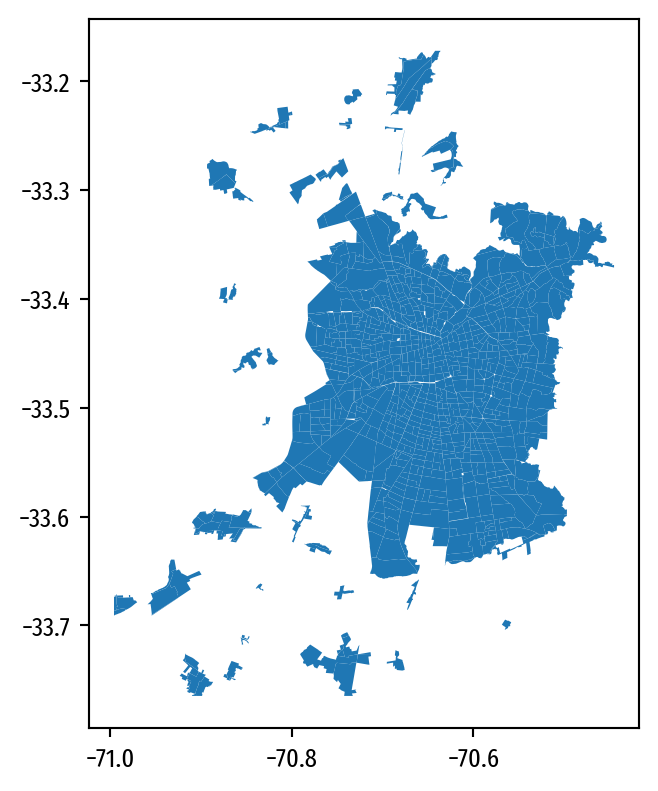

In [15]:
zones.plot()

In [16]:
zones = (
    gpd.read_file("https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/data/processed/scl_zonas_urbanas.json")
    .set_index("ID")
    .to_crs(origenes_viajes.crs)
)
zones.head()


AREA   Zona    Com     Comuna REGION  \
ID                                              
103  837.7500  103.0  13105  El Bosque     13   
104  998.8125  104.0  13105  El Bosque     13   
106  286.2500  106.0  13105  El Bosque     13   
115  857.4375  115.0  13105  El Bosque     13   
116  853.9375  116.0  13105  El Bosque     13   

                           NOM_REGION PROVINCIA NOM_PROVIN NOM_COMUNA  \
ID                                                                      
103  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
104  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
106  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
115  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
116  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   

        URBANO             TIPO NOM_CATEG  SHAPE_Leng  SHAPE_Area  \
ID                                                                  
103  EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123    0.001391   
104  EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123    0.001391   
106  EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123    0.001391   
115  EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123    0.001391   
116  EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123    0.001391   

          area_m2                                           geometry  
ID                                                                    
103  4.575649e+05  POLYGON ((346371.218 6285956.953, 346349.534 6...  
104  7.725462e+05  POLYGON ((344415.434 6285878.048, 344548.462 6...  
106  2.693838e+06  POLYGON ((342466.924 6284938.448, 342467.002 6...  
115  7.534193e+05  POLYGON ((344391.421 6285910.048, 344365.314 6...  
116  7.184305e+05  POLYGON ((345371.399 6286207.024, 345608.811 6...

In [17]:
zones

AREA   Zona    Com     Comuna REGION  \
ID                                              
103  837.7500  103.0  13105  El Bosque     13   
104  998.8125  104.0  13105  El Bosque     13   
106  286.2500  106.0  13105  El Bosque     13   
115  857.4375  115.0  13105  El Bosque     13   
116  853.9375  116.0  13105  El Bosque     13   
..        ...    ...    ...        ...    ...   
364  678.7500  364.0  13118      Macul     13   
369  793.2500  369.0  13118      Macul     13   
365  471.6875  365.0  13118      Macul     13   
734  864.0000  734.0  13301     Colina     13   
734  864.0000  734.0  13301     Colina     13   

                           NOM_REGION PROVINCIA NOM_PROVIN NOM_COMUNA  \
ID                                                                      
103  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
104  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
106  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
115  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
116  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  EL BOSQUE   
..                                ...       ...        ...        ...   
364  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO      MACUL   
369  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO      MACUL   
365  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO      MACUL   
734  REGIÓN METROPOLITANA DE SANTIAGO       133  CHACABUCO     COLINA   
734  REGIÓN METROPOLITANA DE SANTIAGO       133  CHACABUCO     COLINA   

                       URBANO             TIPO NOM_CATEG  SHAPE_Leng  \
ID                                                                     
103                 EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
104                 EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
106                 EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
115                 EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
116                 EL BOSQUE  CAPITAL COMUNAL    CIUDAD    0.152123   
..                        ...              ...       ...         ...   
364                     MACUL  CAPITAL COMUNAL    CIUDAD    0.150721   
369                     MACUL  CAPITAL COMUNAL    CIUDAD    0.150721   
365                     MACUL  CAPITAL COMUNAL    CIUDAD    0.150721   
734  LO ARCAYA - CASAS VIEJAS           URBANO    PUEBLO    0.049422   
734              LOS INGLESES           URBANO    PUEBLO    0.091048   

     SHAPE_Area       area_m2  \
ID                              
103    0.001391  4.575649e+05   
104    0.001391  7.725462e+05   
106    0.001391  2.693838e+06   
115    0.001391  7.534193e+05   
116    0.001391  7.184305e+05   
..          ...           ...   
364    0.001246  6.572471e+05   
369    0.001246  6.393742e+05   
365    0.001246  9.368650e+05   
734    0.000034  3.481754e+05   
734    0.000029  2.777828e+05   

                                              geometry  
ID                                                      
103  POLYGON ((346371.218 6285956.953, 346349.534 6...  
104  POLYGON ((344415.434 6285878.048, 344548.462 6...  
106  POLYGON ((342466.924 6284938.448, 342467.002 6...  
115  POLYGON ((344391.421 6285910.048, 344365.314 6...  
116  POLYGON ((345371.399 6286207.024, 345608.811 6...  
..                                                 ...  
364  POLYGON ((351651.270 6295073.981, 351798.153 6...  
369  POLYGON ((351731.804 6293740.950, 351647.557 6...  
365  POLYGON ((350934.560 6295012.028, 351213.985 6...  
734  POLYGON ((343664.721 6320306.032, 343623.323 6...  
734  POLYGON ((343493.944 6316350.312, 343493.468 6...  

[866 rows x 16 columns]

Ahora nos aseguramos de tener orígenes y destinos que solo se dan dentro del contexto urbano determinado por el `GeoDataFrame` de `zonas`:

- Ocupamos sjoin que es el join spacial de GeoPandas https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html.
En una unión espacial, dos objetos geométricos se fusionan en función de su relación espacial entre sí.

In [18]:
# Filtrar orígenes y destinos dentro de las zonas urbanas
origenes_viajes_urban = gpd.sjoin(origenes_viajes, zones, how="inner", predicate="within")
destinos_viajes_urban = gpd.sjoin(destinos_viajes, zones, how="inner", predicate="within")

In [19]:
origenes_viajes_urban.head()

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
0      173431  17343102  1734310202       1          94.0           94.0   
19216  136571  13657103  1365710302       2          94.0           93.0   
40941  173120  17312002  1731200204       1          94.0           94.0   
41067  173393  17339303  1733930302       1          94.0           94.0   
41259  173901  17390101  1739010101       1          94.0           94.0   

       SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  \
0               2.0            2.0         400          407  ...   
19216           2.0            6.0         400          211  ...   
40941           2.0            2.0         400          386  ...   
41067           2.0            2.0         400          386  ...   
41259           2.0            2.0         400          410  ...   

                             NOM_REGION  PROVINCIA  NOM_PROVIN  NOM_COMUNA  \
0      REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO       MAIPÚ   
19216  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO       MAIPÚ   
40941  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO       MAIPÚ   
41067  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO       MAIPÚ   
41259  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO       MAIPÚ   

      URBANO             TIPO  NOM_CATEG SHAPE_Leng  SHAPE_Area        area_m2  
0      MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556  958634.613588  
19216  MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556  958634.613588  
40941  MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556  958634.613588  
41067  MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556  958634.613588  
41259  MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556  958634.613588  

[5 rows x 114 columns]

In [20]:
origenes_viajes_urban.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Grafiquemos los datos. Utilizaremos la función `figure_from_geodataframe` de aves que configura los ejes de manera automática, y el método `plot` de geopandas puede graficar directamente los puntos de origen/destino:

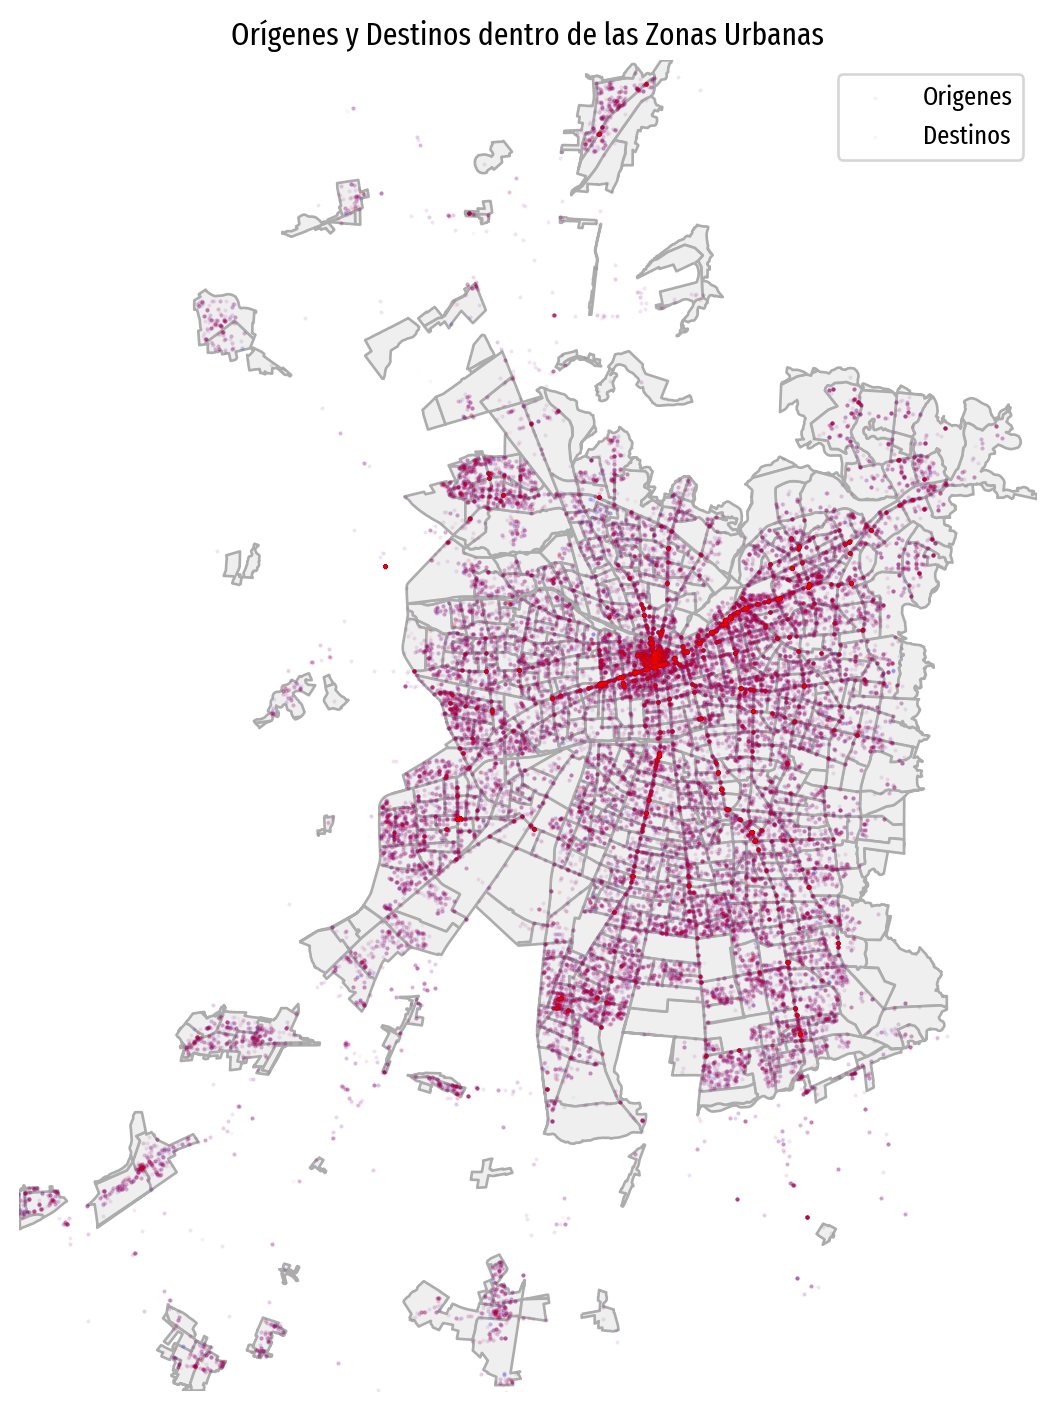

In [21]:
# figure_from_geodataframe retorna un canvas para dibujar los mapas
# height es la altura relativa de la visualizacion con respecto a los datos en
# el geodataframe
fig, ax = figure_from_geodataframe(zones, height=9)

zones.plot(ax=ax, color="#efefef", edgecolor="#abacab", linewidth=1)
origenes_viajes.plot(ax=ax, markersize=1, marker=".", color="blue", alpha=0.05, label="Origenes")
destinos_viajes.plot(ax=ax, markersize=1, marker=".", color="red", alpha=0.05, label="Destinos")

ax.legend(loc='upper right')
ax.set_title('Orígenes y Destinos dentro de las Zonas Urbanas');

Text(0, 0.5, 'Coordenada Y')

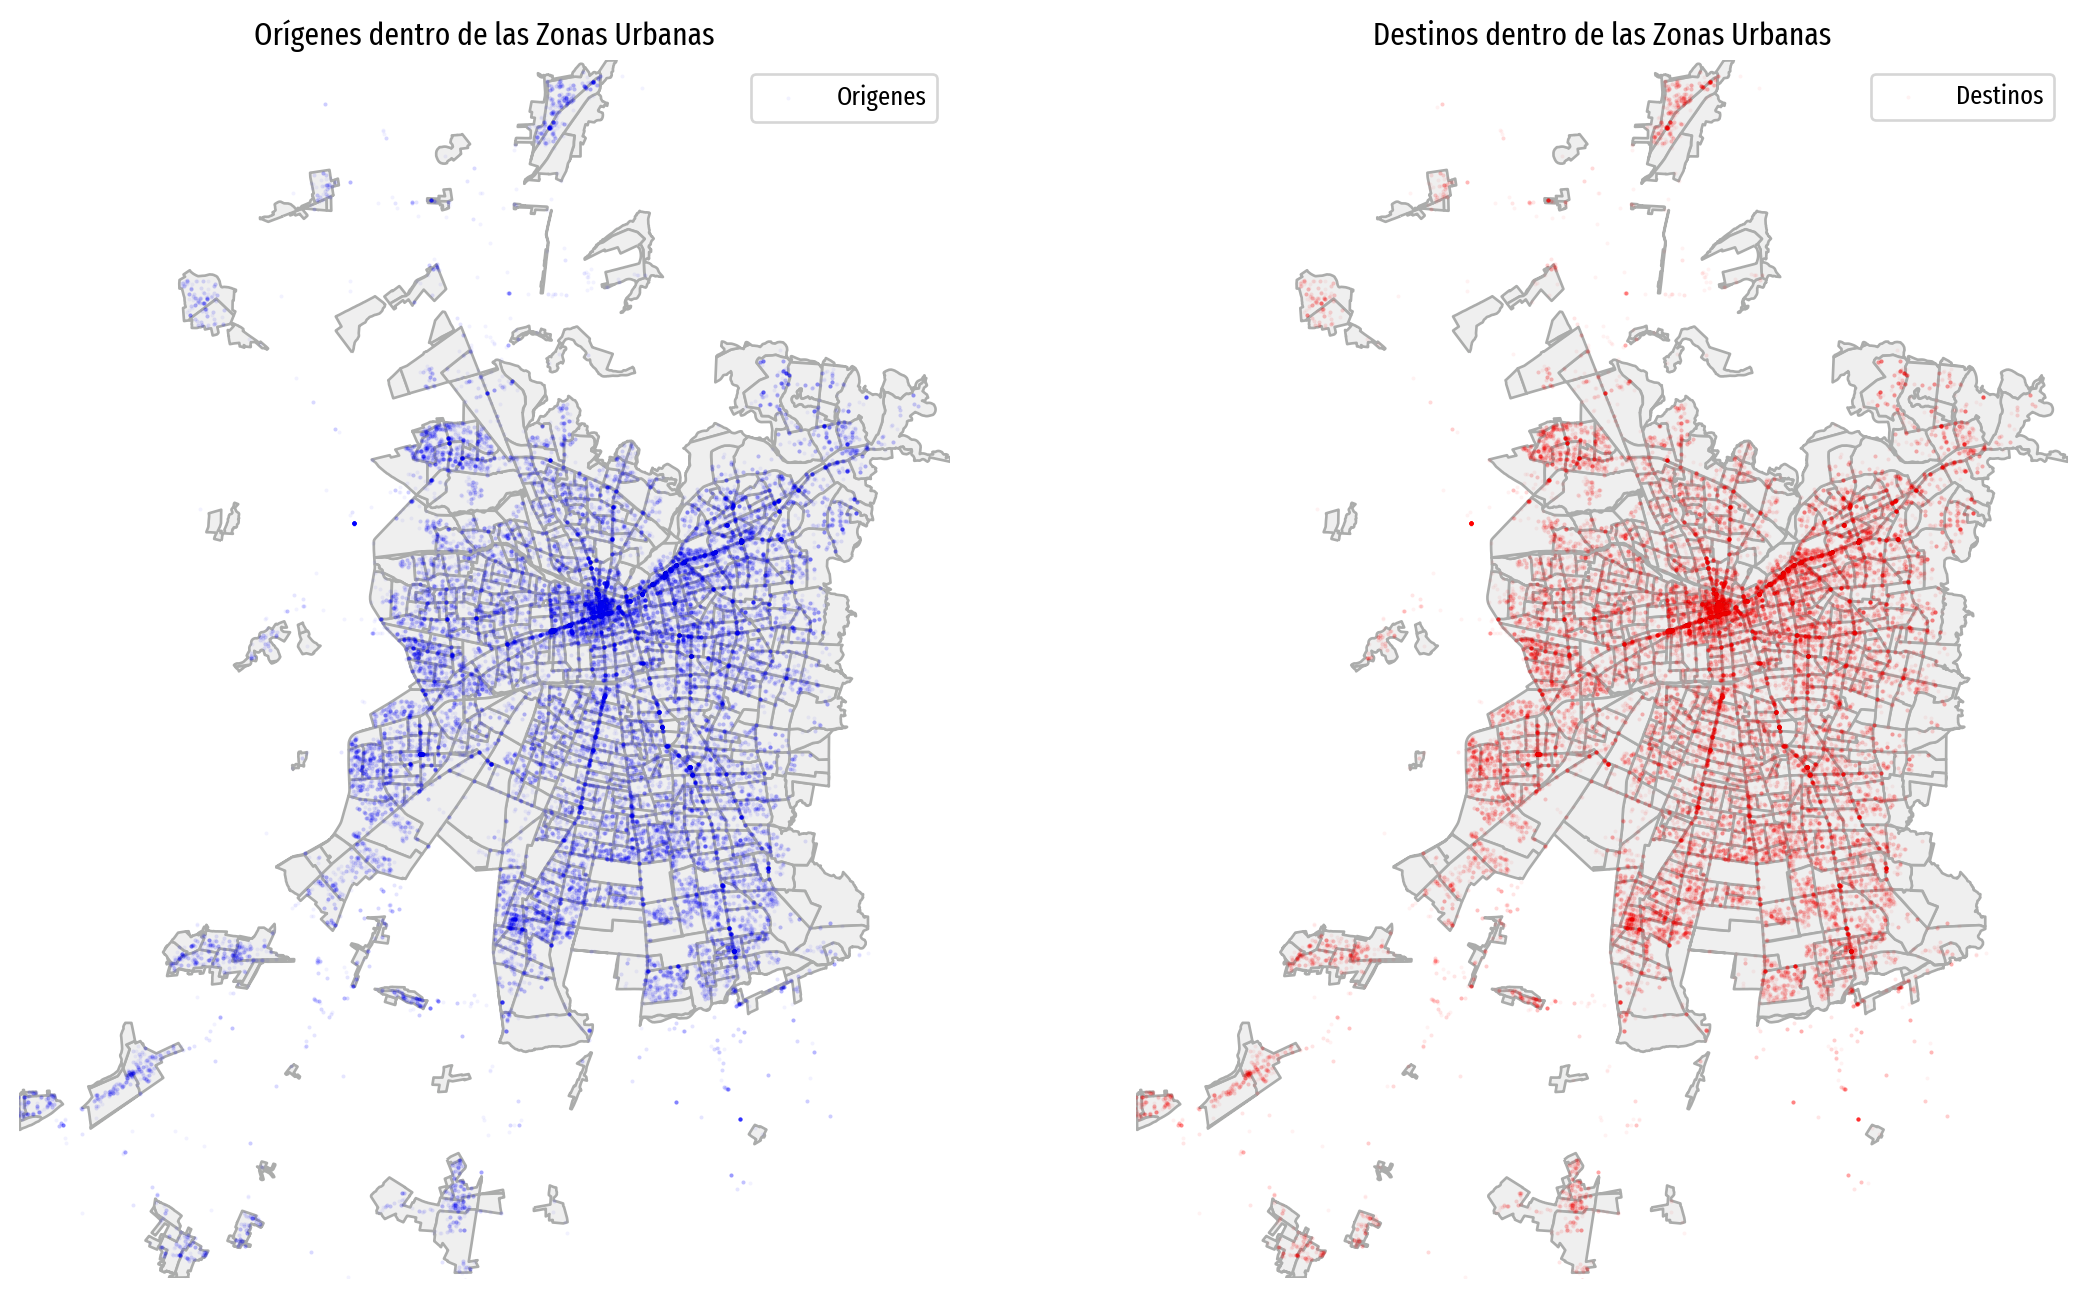

In [22]:
fig, ax = figure_grid_from_geodataframe(zones, ncols=2, height=9)

zones.plot(ax=ax[0], color="#efefef", edgecolor="#abacab", linewidth=1)
origenes_viajes.plot(ax=ax[0], markersize=1, marker=".", color="blue", alpha=0.05, label="Origenes")
zones.plot(ax=ax[1], color="#efefef", edgecolor="#abacab", linewidth=1)
destinos_viajes.plot(ax=ax[1], markersize=1, marker=".", color="red", alpha=0.05, label="Destinos")


# Configurar leyenda y título
ax[0].legend()
ax[0].set_title('Orígenes dentro de las Zonas Urbanas')
ax[0].set_xlabel('Coordenada X')
ax[0].set_ylabel('Coordenada Y')

ax[1].legend()
ax[1].set_title('Destinos dentro de las Zonas Urbanas')
ax[1].set_xlabel('Coordenada X')
ax[1].set_ylabel('Coordenada Y')

In [23]:
origenes_viajes_urban['ModoDifusion'].value_counts()

ModoDifusion
Bip!                    22047
Auto                    16121
Caminata                 9782
Otros                    5733
Taxi Colectivo           2176
Bicicleta                1831
Bip! - Otros Publico     1576
Taxi                     1061
Bip! - Otros Privado      727
Name: count, dtype: int64

Nos damos cuenta que hay muchos datos. Tenemos que:

- **Filtrarlos**, es decir, decidir cuáles son relevantes para la tarea.
- **Visualizarlos** utilizando la técnica adecuada.

Para filtrarlos, fíjemonos en cuatro modos de transporte: público (`Bip!`), privado (`Auto`) y activo (`Caminata` y `Bicicleta`). Y por ahora veamos los viajes al trabajo.
Para visualizarlos, en aves tenemos una función `dot_map` que hace un mapa de puntos y que nos permitirá configurar algunos aspectos del gráfico considerando los aspectos que vimos en la clase teórica.

El gráfico se puede hacer así:

In [24]:
# Filtrar por modos de transporte y propósito del viaje
modos_transporte = ['Bip!', 'Auto', 'Caminata', 'Bicicleta']
viajes_trabajo = origenes_viajes_urban[(origenes_viajes_urban['ModoDifusion'].isin(modos_transporte)) & (origenes_viajes_urban['Proposito'] == 'Al trabajo')]


In [25]:
viajes_trabajo

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
41602  174491  17449101  1744910101       2          94.0           70.0   
43152  176951  17695103  1769510301       2          94.0           70.0   
43607  177711  17771102  1777110201       1          94.0           94.0   
43611  177711  17771104  1777110401       1          94.0           94.0   
44392  179171  17917103  1791710301       2          94.0           91.0   
...       ...       ...         ...     ...           ...            ...   
83509  250932  25093201  2509320106       1          77.0           77.0   
88920  259960  25996004  2599600401       1         335.0           93.0   
89219  260473  26047301  2604730101       2         335.0           70.0   
89221  260473  26047302  2604730201       1         335.0          333.0   
89631  261121  26112105  2611210501       1         335.0           94.0   

       SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  \
41602           2.0            4.0         400           20  ...   
43152           2.0            4.0         400           13  ...   
43607           2.0            2.0         400          416  ...   
43611           2.0            2.0         400          405  ...   
44392           2.0            3.0         400          428  ...   
...             ...            ...         ...          ...  ...   
83509           1.0            1.0         602          606  ...   
88920           5.0            6.0         637          196  ...   
89219           5.0            4.0         637           13  ...   
89221           5.0            2.0         637           67  ...   
89631           5.0            2.0         637          405  ...   

                             NOM_REGION  PROVINCIA  NOM_PROVIN   NOM_COMUNA  \
41602  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO        MAIPÚ   
43152  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO        MAIPÚ   
43607  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO        MAIPÚ   
43611  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO        MAIPÚ   
44392  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO        MAIPÚ   
...                                 ...        ...         ...          ...   
83509  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO        RENCA   
88920  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO  SAN JOAQUÍN   
89219  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO  SAN JOAQUÍN   
89221  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO  SAN JOAQUÍN   
89631  REGIÓN METROPOLITANA DE SANTIAGO        131    SANTIAGO  SAN JOAQUÍN   

            URBANO             TIPO  NOM_CATEG SHAPE_Leng  SHAPE_Area  \
41602        MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556   
43152        MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556   
43607        MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556   
43611        MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556   
44392        MAIPÚ  CAPITAL COMUNAL     CIUDAD   0.359284    0.005556   
...            ...              ...        ...        ...         ...   
83509        RENCA  CAPITAL COMUNAL     CIUDAD   0.291607    0.002303   
88920  SAN JOAQUÍN  CAPITAL COMUNAL     CIUDAD   0.134525    0.000965   
89219  SAN JOAQUÍN  CAPITAL COMUNAL     CIUDAD   0.134525    0.000965   
89221  SAN JOAQUÍN  CAPITAL COMUNAL     CIUDAD   0.134525    0.000965   
89631  SAN JOAQUÍN  CAPITAL COMUNAL     CIUDAD   0.134525    0.000965   

             area_m2  
41602  958634.613588  
43152  958634.613588  
43607  958634.613588  
43611  958634.613588  
44392  958634.613588  
...              ...  
83509  265397.352137  
88920  278473.949114  
89219  278473.949114  
89221  278473.949114  
89631  278473.949114  

[9965 rows x 114 columns]

# Dot Map

Text(0, 0.5, 'Coordenada Y')

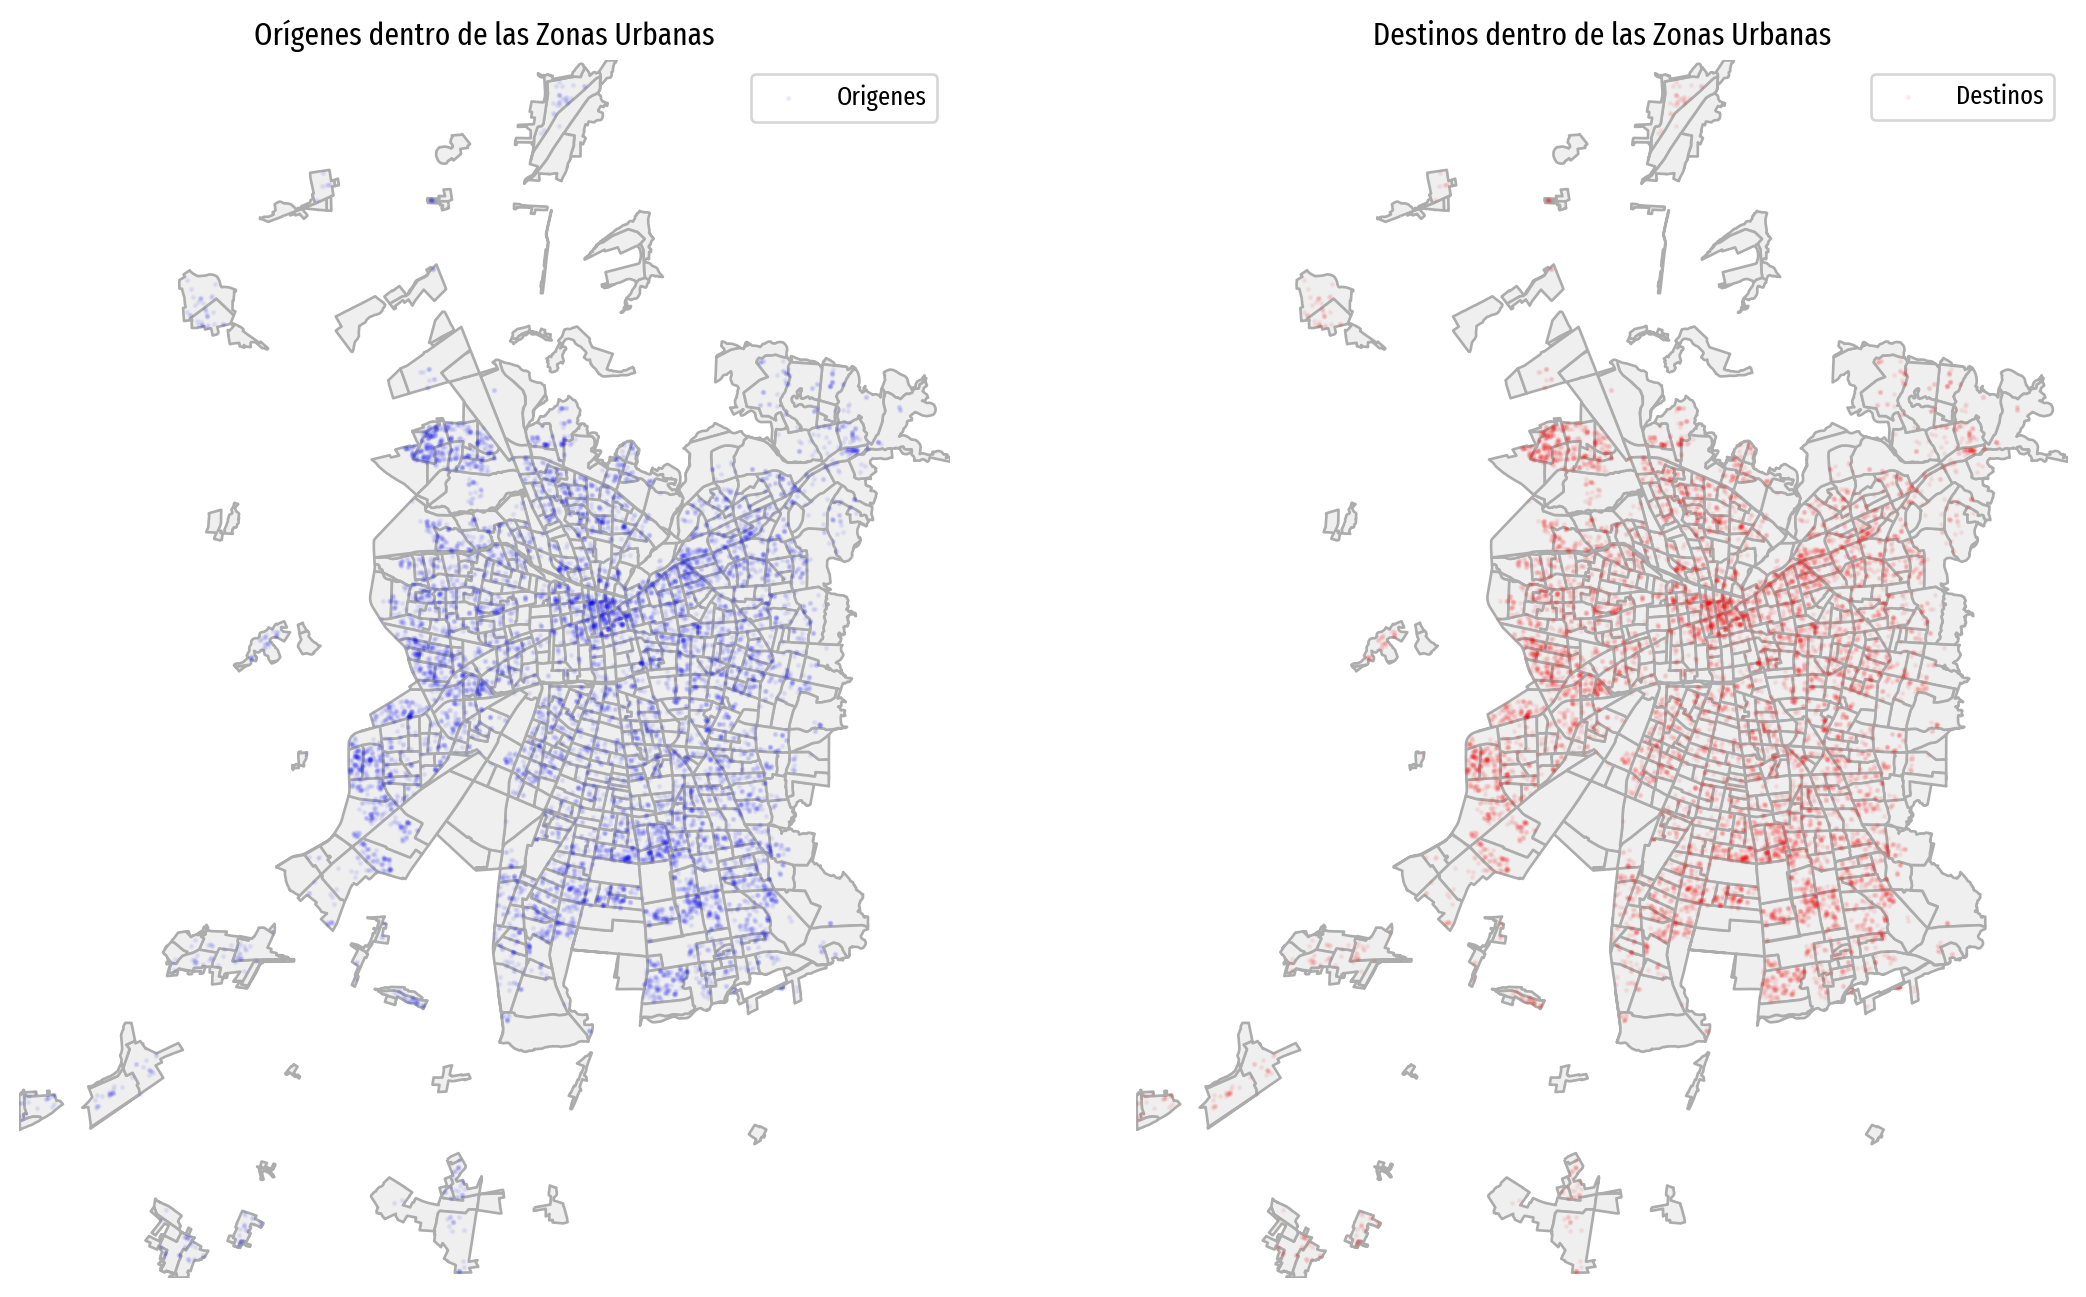

In [26]:
fig, ax = figure_grid_from_geodataframe(zones, ncols=2, height=9)

zones.plot(ax=ax[0], color="#efefef", edgecolor="#abacab", linewidth=1)
viajes_trabajo.plot(ax=ax[0], markersize=5, marker=".", color="blue", alpha=0.05, label="Origenes")
zones.plot(ax=ax[1], color="#efefef", edgecolor="#abacab", linewidth=1)
viajes_trabajo.plot(ax=ax[1], markersize=5, marker=".", color="red", alpha=0.05, label="Destinos")


# Configurar leyenda y título
# Configurar leyenda y título
ax[0].legend()
ax[0].set_title('Orígenes dentro de las Zonas Urbanas')
ax[0].set_xlabel('Coordenada X')
ax[0].set_ylabel('Coordenada Y')

ax[1].legend()
ax[1].set_title('Destinos dentro de las Zonas Urbanas')
ax[1].set_xlabel('Coordenada X')
ax[1].set_ylabel('Coordenada Y')

In [27]:
viajes_trabajo.groupby("ModoDifusion")

# Dot Map Categórico

Auto
Bicicleta
Bip!
Caminata


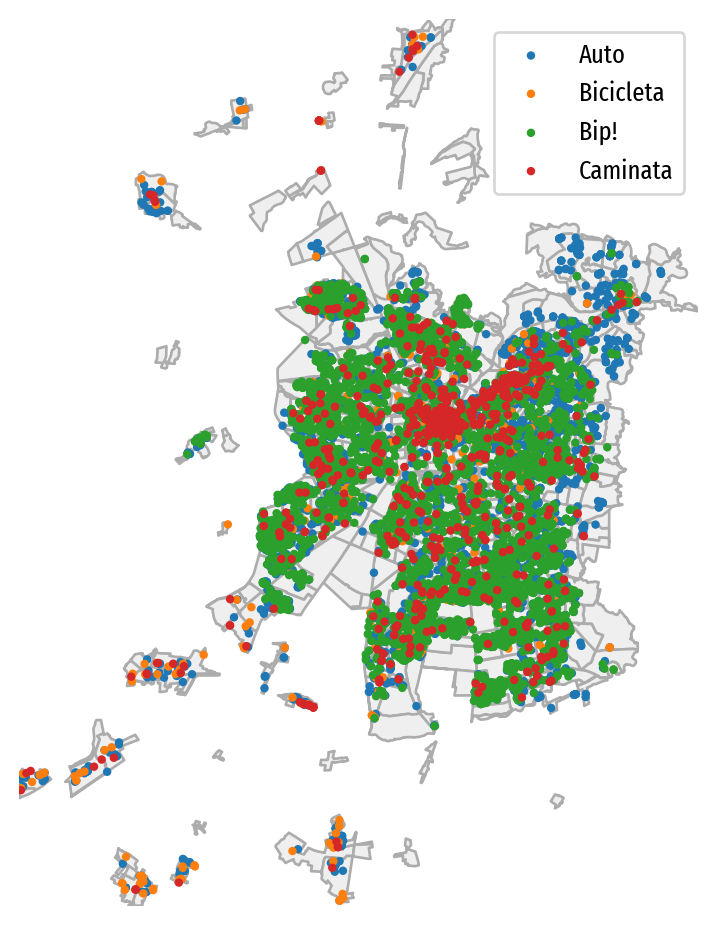

In [28]:
fig, ax = figure_from_geodataframe(zones, height=6, remove_axes=True)

zones.plot(ax=ax, color="#efefef", edgecolor="#abacab", linewidth=1)

for idx, group in viajes_trabajo.groupby("ModoDifusion"):
    print(idx)
    dot_map(ax, group, size=10, label=idx)

ax.legend()

Notamos que cada categoría utiliza un tono de color distinto. Sin embargo, cuesta ver una posible distribución geográfica debido a la oclusión y aglomeramiento de los viajes.

Una posible solución es darle un tamaño a cada punto que sea proporcional al peso de los viajes. En tal caso, en vez de `dot_map` utilizaremos `bubble_map`:

# Bubble Map

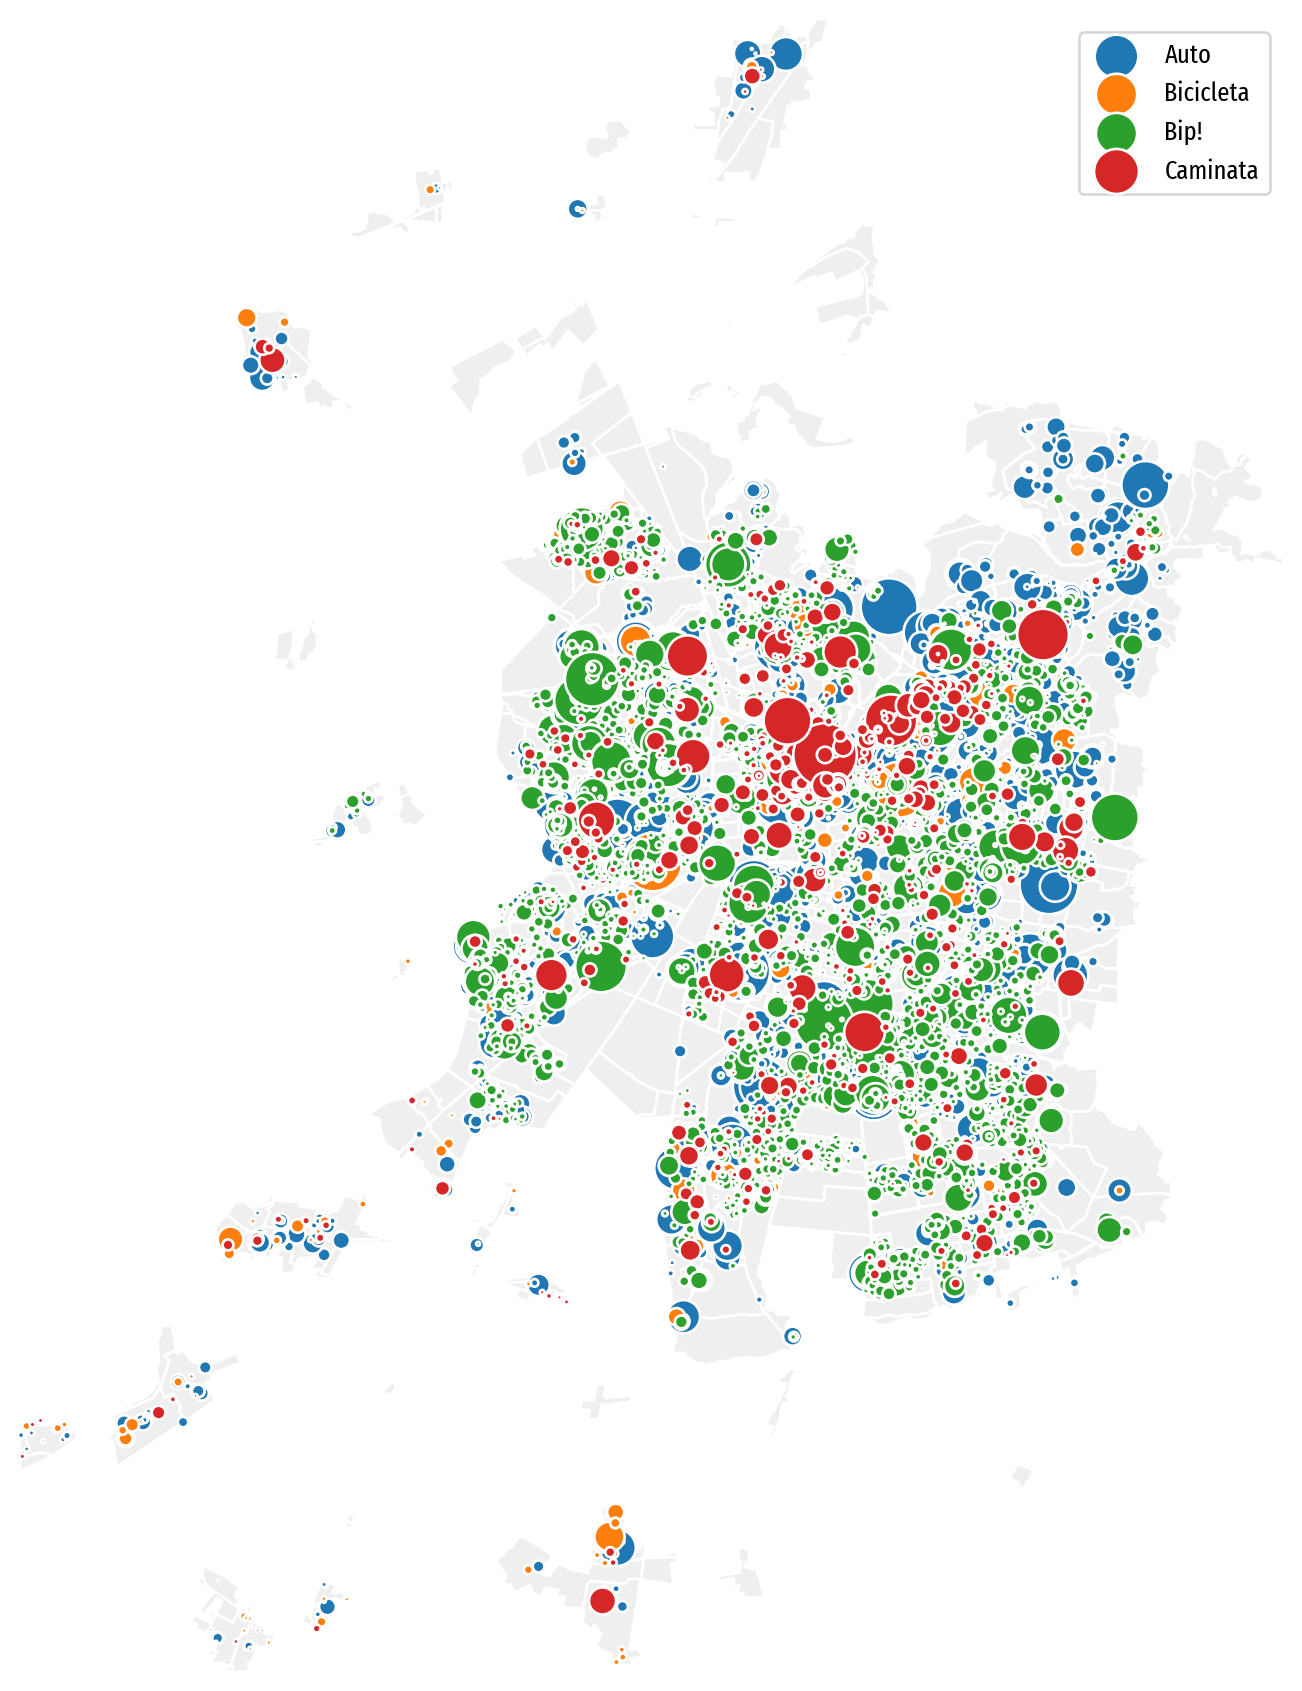

In [29]:
fig, ax = figure_from_geodataframe(zones, height=9, remove_axes=True)

zones.plot(ax=ax, color="#efefef", edgecolor="white", linewidth=1)

for idx, group in viajes_trabajo.groupby("ModoDifusion"):
        bubble_map(ax, group, size="PesoLaboral", scale=0.15, label=idx)

ax.legend()

fig.tight_layout()

La idea sonaba bien, sin embargo, el gráfico no nos permite responder la pregunta (aunque es un lindo gráfico para compartir y contemplar). Esto se debe a varios factores, incluyendo la interferencia entre los canales utilizados en la codificación.

También la implementación del gráfico es compleja. Requiere ciclos a través de los resultados de una operación groupby.

Utilizaremos la grilla GeoFacetGrid de aves (inspirada en FacetGrid de seaborn) para hacer el mismo gráfico pero utilizando conceptos vistos en clase.

# GeoFacetGrid

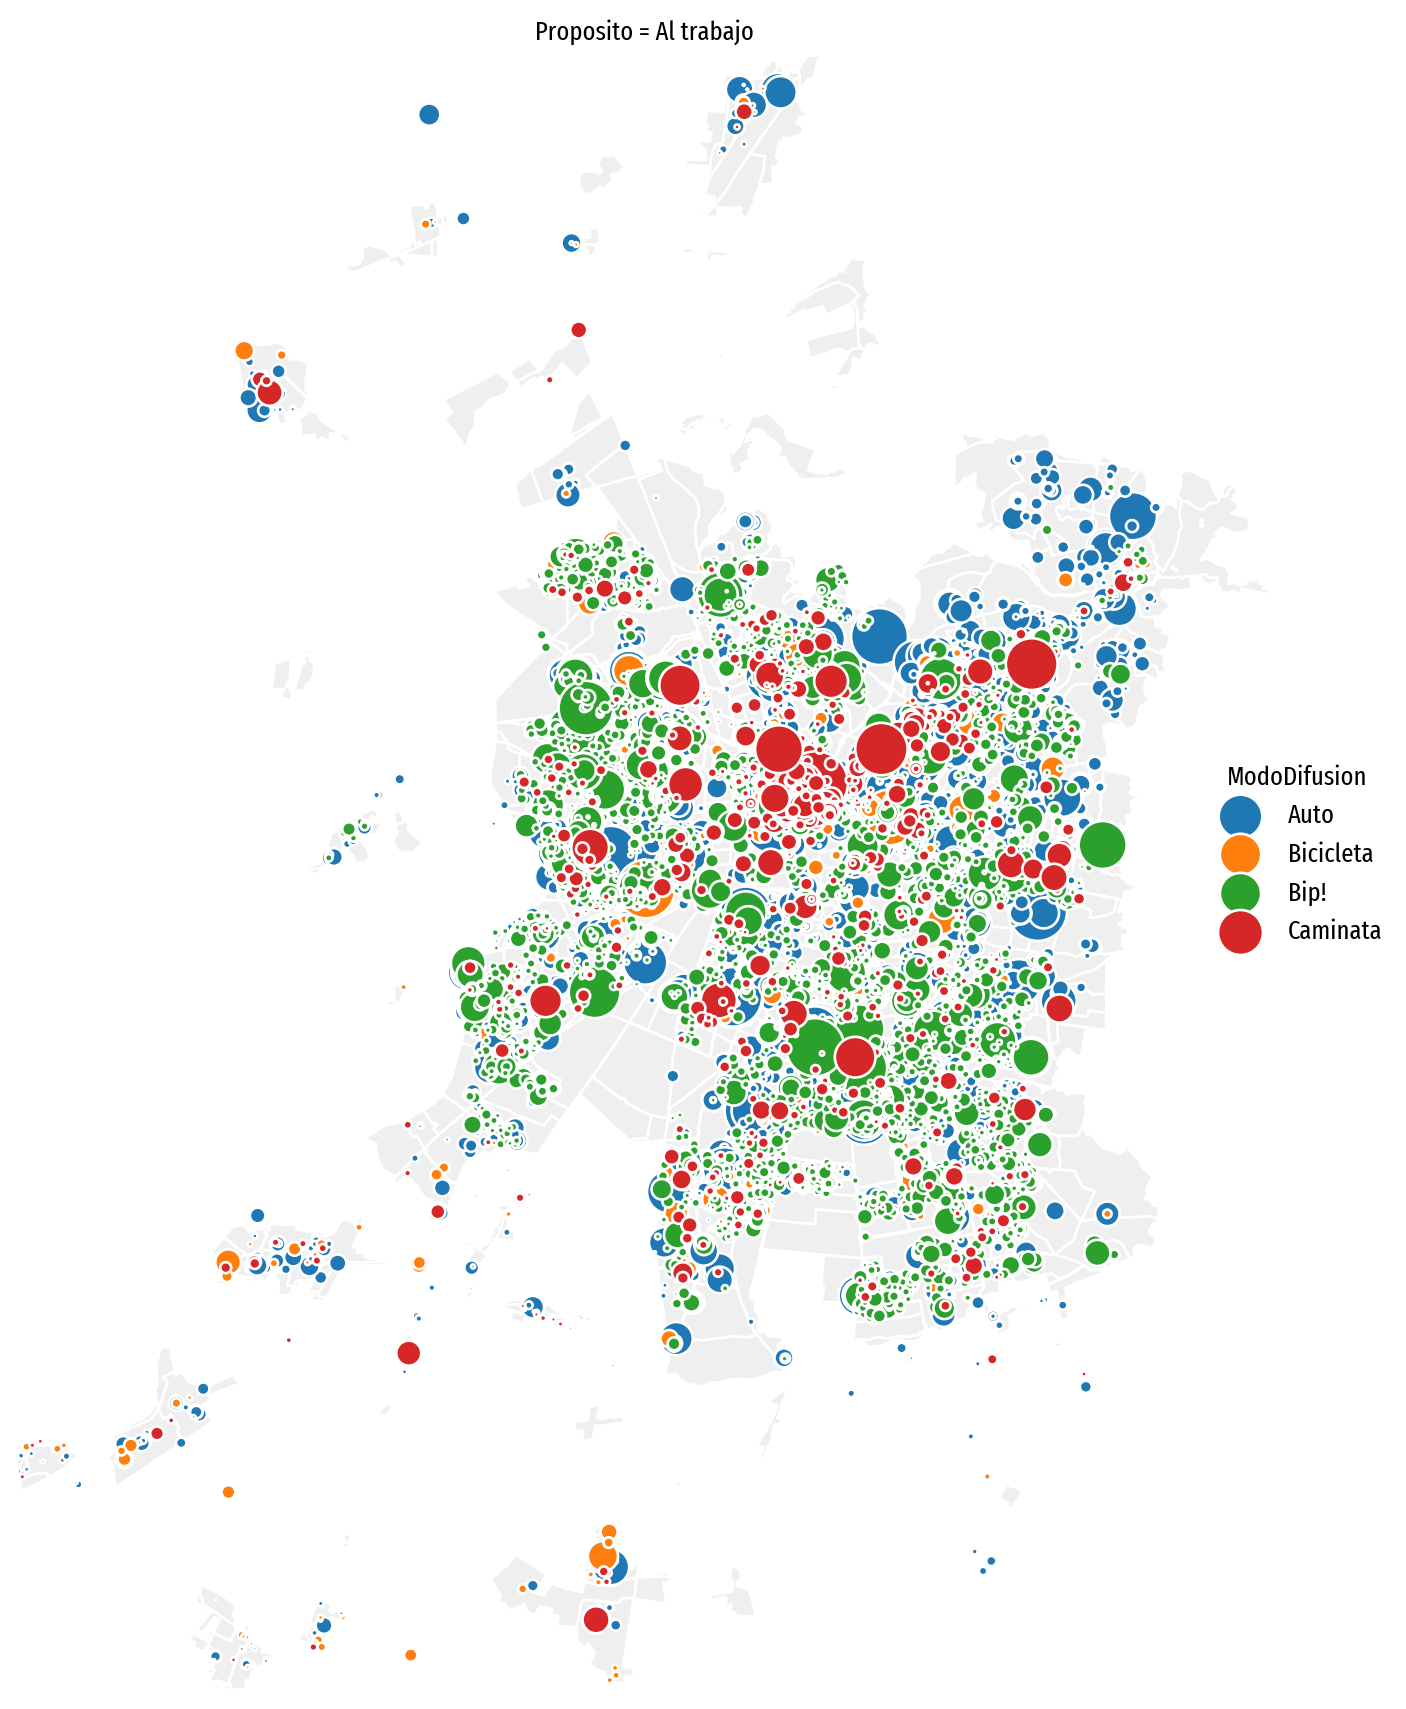

In [30]:
grid = GeoFacetGrid(
    # los datos
    origenes_viajes,
    # el contexto geográfico. es opcional, se utiliza para configurar el gráfico
    context=zones,
    # la variable que mapearemos a las filas del gráfico
    row="Proposito",
    # en este caso, solo una fila
    row_order=["Al trabajo"],
    # el canal de codificación tono (hue) expresará la columna categórica ModoDifusion
    hue="ModoDifusion",
    # solo veremos estas categorías
    hue_order=["Auto", "Bicicleta", "Bip!", "Caminata"],
    # la altura del gráfico
    height=9,
)

# visualizamos el contexto
grid.add_layer(zones, color="#efefef", edgecolor="white", linewidth=1)

# agregamos los bubble_map correspondientes
grid.add_layer(bubble_map, size="PesoLaboral", scale=0.15)

# agregamos la leyenda
grid.add_legend()

grid.fig.tight_layout()


La idea sonaba bien, sin embargo, el gráfico no nos permite responder la pregunta (aunque es un lindo gráfico para compartir y contemplar). Esto se debe a varios factores, incluyendo la interferencia entre los canales utilizados en la codificación.

También la implementación del gráfico es compleja. Requiere ciclos a través de los resultados de una operación `groupby`.

Utilizaremos la grilla `GeoFacetGrid` de aves (inspirada en `FacetGrid` de seaborn) para hacer el mismo gráfico pero utilizando conceptos vistos en clase.

Utilizaremos la grilla GeoFacetGrid de aves (inspirada en FacetGrid de seaborn) para hacer el mismo gráfico pero utilizando conceptos vistos en clase.

La implementación del gráfico es distinta, sin embargo, los problemas conceptuales se mantienen. Ahora bien, al utilizar la grilla, podemos utilizar sus opciones para reducir su complejidad a través de _facetas_.

Por ejemplo, podemos dividir el gráfico en columnas, donde cada columna muestra un modo de transporte diferente:

In [31]:
grid = GeoFacetGrid(
    #los datos
    origenes_viajes,
    #las zonas o el contexto
    context=zones,
    #la variable que mapearemos a las filas del gráfico
    row="Proposito",
    # en este caso, dos filas
    row_order=["Al trabajo", "De salud"],

    #la variable que mapeamos en las columnas
    col="ModoDifusion",
    # solo veremos estas categorías
    col_order=["Auto", "Bip!", "Caminata", "Bicicleta"],

    # el canal de codificación tono (hue) expresará la columna categórica ModoDifusion
    hue="ModoDifusion",
    palette="plasma",
    # la altura del gráfico
    height=9
)

grid.add_layer(zones, color="#efefef", edgecolor="white", linewidth=1)
grid.add_layer(bubble_map, size="PesoLaboral", scale=0.15, edgecolor="black", alpha=0.5)


Output hidden; open in https://colab.research.google.com to view.

In [32]:
origenes_viajes.columns

Index(['Hogar', 'Persona', 'Viaje', 'Etapas', 'ComunaOrigen', 'ComunaDestino',
       'SectorOrigen', 'SectorDestino', 'ZonaOrigen', 'ZonaDestino',
       'OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY',
       'Proposito', 'PropositoAgregado', 'ActividadDestino', 'MediosUsados',
       'ModoAgregado', 'ModoPriPub', 'ModoMotor', 'HoraIni', 'HoraFin',
       'HoraMedia', 'TiempoViaje', 'TiempoMedio', 'Periodo', 'MinutosDespues',
       'CuadrasDespues', 'FactorLaboralNormal', 'FactorSabadoNormal',
       'FactorDomingoNormal', 'FactorLaboralEstival',
       'FactorFindesemanaEstival', 'CodigoTiempo', 'ModoDifusion',
       'DistEuclidiana', 'DistManhattan', 'Imputada', 'AnoNac', 'Sexo',
       'Relacion', 'Viajes', 'LicenciaConducir', 'PaseEscolar', 'AdultoMayor',
       'Estudios', 'Curso', 'Actividad', 'Ocupacion', 'ActividadEmpresa',
       'JornadaTrabajo', 'DondeEstudia', 'DirActividadCoordX',
       'DirActividadCoordY', 'DirEstudiosCoordX', 'DirEstudiosCoordY',
 

# Actividad

Realice un análisis por grupos etáreo.

- Definan categorías de grupos.
- Elija un rango etario y visualice lugares de la ciudad que visita ese rango etario, tanto en general como por propósito de viaje.

In [33]:
# Calcula la edad de las personas
origenes_viajes["Edad"] = 2013 - origenes_viajes["AnoNac"]

# Agrupa a las personas en intervalos de 5 años
origenes_viajes["GrupoEtareo"] = origenes_viajes["Edad"] - (origenes_viajes["Edad"] % 5)

# Muestra las primeras filas del DataFrame para verificar los cambios

origenes_viajes.head()

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
0  173431  17343102  1734310202       1          94.0           94.0   
1  173431  17343102  1734310201       1          94.0           94.0   
2  173431  17343101  1734310101       2          94.0          328.0   
3  173431  17343101  1734310102       1         328.0           70.0   
4  173431  17343101  1734310103       2          70.0           94.0   

   SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  MontoDiv  \
0           2.0            2.0         400          407  ...   81067.0   
1           2.0            2.0         407          400  ...   81067.0   
2           2.0            2.0         407          126  ...   81067.0   
3           2.0            4.0         126           15  ...   81067.0   
4           4.0            2.0          15          407  ...   81067.0   

   ImputadoDiv  MontoArr  ImputadoArr IngresoHogar FactorHogar  PesoLaboral  \
0            1    120000            0       789356    76.81028    53.391740   
1            1    120000            0       789356    76.81028    53.391740   
2            1    120000            0       789356    76.81028    37.886589   
3            1    120000            0       789356    76.81028    52.214368   
4            1    120000            0       789356    76.81028    52.214368   

                         geometry  Edad GrupoEtareo  
0  POINT (335208.719 6288387.000)    41          40  
1  POINT (338812.281 6292391.000)    41          40  
2  POINT (338812.281 6292391.000)    24          20  
3  POINT (343526.594 6297299.000)    24          20  
4  POINT (345015.906 6297331.000)    24          20  

[5 rows x 100 columns]

Aquí, crameos una nueva columna GrupoEtareo que agrupa las edades en intervalos de 5 años. La operación (origenes_viajes["Edad"] % 5) devuelve el residuo de la división de la edad entre 5, y restar este residuo de la edad redondea la edad  hacia abajo al inicio del intervalo de 5 años. Por ejemplo, si la edad es 27, el cálculo sería:

- 27 % 5 = 2 (residuo de dividir 27 entre 5)
- 27 - 2 = 25 (inicio del intervalo de 25-29 años)